In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
deep_data = pd.read_csv('../dataset/data_prep.csv')
deep_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
sample_deep = deep_data.sample(frac=0.4, random_state=42)
sample_deep.shape

(2545048, 11)

### Spliting Data

In [4]:
X = sample_deep.drop(['isFraud', 'isFlaggedFraud','nameDest','nameOrig'], axis=1)
y = sample_deep['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling Feature

In [5]:
sc = StandardScaler()
model = sc.fit(X)
X = model.transform(X)
X

array([[ 0.24284338, -1.26956348,  0.24368031, ..., -0.17225632,
        -0.19156582, -0.30082172],
       [-1.60463293,  0.95252629, -0.27428166, ..., -0.28584117,
        -0.32475559, -0.33406571],
       [-1.63975606, -1.26956348, -0.04565367, ..., -0.20377642,
        -0.26549312, -0.32072504],
       ...,
       [-0.38937285,  0.95252629, -0.28040782, ..., -0.21803714,
        -0.32475559, -0.33406571],
       [ 0.41143437, -0.52886689,  0.18071887, ..., -0.29223975,
        -0.1843709 , -0.12504036],
       [ 1.90065482, -1.26956348, -0.1171341 , ...,  1.44409428,
        -0.01560982, -0.0778534 ]])

### Model Deep Analytics

In [6]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

c:\Users\restu\OneDrive\Documents\Project\Studi Data Science\Improving Financial Security with Fraud Analysis\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile Model

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
early_stop = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=3,  # Number of epochs with no improvement after which training will stop
    verbose=1,  # Output messages
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored metric
)

### Train Model

In [9]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],  # Add the early stopping callback
    verbose=2
)

Epoch 1/20
7954/7954 - 25s - 3ms/step - accuracy: 0.9889 - loss: 539.4070 - val_accuracy: 0.9986 - val_loss: 0.0125
Epoch 2/20
7954/7954 - 40s - 5ms/step - accuracy: 0.9984 - loss: 1.2561 - val_accuracy: 0.9986 - val_loss: 0.0101
Epoch 3/20
7954/7954 - 22s - 3ms/step - accuracy: 0.9987 - loss: 0.2587 - val_accuracy: 0.9986 - val_loss: 0.0103
Epoch 4/20
7954/7954 - 22s - 3ms/step - accuracy: 0.9987 - loss: 0.0800 - val_accuracy: 0.9986 - val_loss: 0.0101
Epoch 5/20
7954/7954 - 23s - 3ms/step - accuracy: 0.9987 - loss: 0.2308 - val_accuracy: 0.9986 - val_loss: 0.0098
Epoch 6/20
7954/7954 - 24s - 3ms/step - accuracy: 0.9987 - loss: 0.2737 - val_accuracy: 0.9986 - val_loss: 0.0102
Epoch 7/20
7954/7954 - 24s - 3ms/step - accuracy: 0.9987 - loss: 0.0958 - val_accuracy: 0.9986 - val_loss: 0.0102
Epoch 8/20
7954/7954 - 27s - 3ms/step - accuracy: 0.9987 - loss: 0.1555 - val_accuracy: 0.9986 - val_loss: 0.0102
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 5.


### Model Evaluation

In [10]:
_, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy*100:.2f}%")

15907/15907 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9987 - loss: 0.0096
Test accuracy: 99.86%


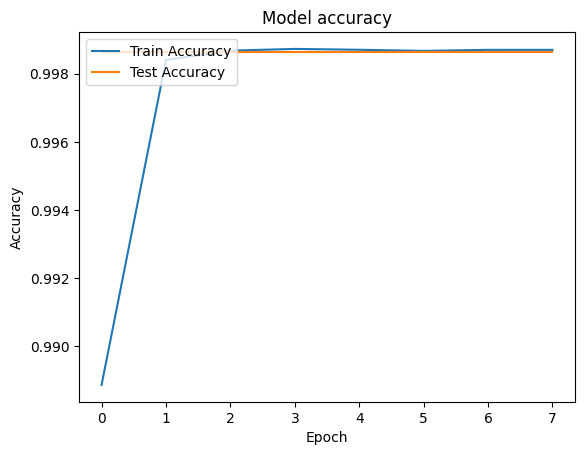

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()